In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import zipfile
import io

In [5]:
df = pd.read_csv('euromillions_Fusion.csv',sep=';', encoding='ISO-8859-1')

In [9]:
df_ligth = df[['boule_1','boule_2','boule_3','boule_4','boule_5','etoile_1','etoile_2']]

In [13]:
for column in df_ligth.columns:
    counts = df_ligth[column].value_counts()
#    print(f"\nDistribution of {column}:\n{counts}")

## Create Data with a windows

In [76]:
# frequency of a number in the last window rows
def count_frequency(dataframe, windows):
    df_ = dataframe.copy()
    # for col in ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']:
    #     df_[f'freq_{col}'] = df_.apply(lambda row: sum(df_[['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']].iloc[max(0, row.name - windows):row.name].values.flatten() == row[col]), axis=1)
    for col in ['etoile_1', 'etoile_2']:
        df_[f'freq_{col}'] = df_.apply(lambda row: sum(df_[['etoile_1', 'etoile_2']].iloc[max(0, row.name - windows):row.name].values.flatten() == row[col]), axis=1)
    return df_

In [457]:
windows = 5

In [458]:
df_ligth.tail(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
764,48,23,14,50,39,12,3
765,32,19,41,8,42,12,9


In [459]:
df_ligth.head(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
0,41,6,13,39,9,2,12
1,35,44,17,37,43,10,2


In [460]:
df_ligth = df_ligth[::-1].reset_index(drop=True)

In [461]:
df_ligth.tail(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
764,35,44,17,37,43,10,2
765,41,6,13,39,9,2,12


In [462]:
df_ligth.head(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
0,32,19,41,8,42,12,9
1,48,23,14,50,39,12,3


In [463]:
df_extend = count_frequency(df_ligth, windows = windows)

In [464]:
df_extend.shape

(766, 14)

In [465]:
df_extend.head(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2,freq_boule_1,freq_boule_2,freq_boule_3,freq_boule_4,freq_boule_5,freq_etoile_1,freq_etoile_2
0,32,19,41,8,42,12,9,0,0,0,0,0,0,0
1,48,23,14,50,39,12,3,0,0,0,0,0,1,0


In [466]:
# def quadra_dif(data):
#   df_ = data.copy()
#   columns_to_diff = ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']
#   for i in range(0, df_.shape[0]):
#     df_['sum_diff_r2'] = ((df_[columns_to_diff].diff(axis=1) ** 2).sum(axis=1)).astype(int)
#   return df_

In [467]:
# df_extend = quadra_dif(df_extend)

In [468]:
# df_extend.head(3)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2,freq_boule_1,freq_boule_2,freq_boule_3,freq_boule_4,freq_boule_5,freq_etoile_1,freq_etoile_2,sum_diff_r2
0,32,19,41,8,42,12,9,0,0,0,0,0,0,0,2898
1,48,23,14,50,39,12,3,0,0,0,0,0,1,0,2123
2,50,27,28,48,44,7,12,1,0,0,1,0,0,2,946


In [469]:
# How long the number didn't not appear
def no_star(data):
  df_ = data.copy()
  for num in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
    mask = ((df_['etoile_1'] == num) | (df_['etoile_2'] == num))
    df_[f'no_s{num}'] = (~mask).groupby((mask).cumsum()).cumsum()
    # df_[f'no_{num}'] = df_[f'no_{num}'].shift(fill_value=0).astype(int)
  return df_

# def no_ball(data):
#   df_ = data.copy()
#   for num in range(51):
#     mask = ((df_['boule_1'] == num) | (df_['boule_2'] == num) | (df_['boule_3'] == num) | (df_['boule_4'] == num) | (df_['boule_5'] == num))
#     df_[f'no_b{num}'] = (~mask).groupby((mask).cumsum()).cumsum()
#   return df_

In [472]:
df_extend = no_star(df_extend)

In [473]:
df_extend.head(22)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2,freq_boule_1,freq_boule_2,freq_boule_3,...,no_s3,no_s4,no_s5,no_s6,no_s7,no_s8,no_s9,no_s10,no_s11,no_s12
0,32,19,41,8,42,12,9,0,0,0,...,1,1,1,1,1,1,0,1,1,0
1,48,23,14,50,39,12,3,0,0,0,...,0,2,2,2,2,2,1,2,2,0
2,50,27,28,48,44,7,12,1,0,0,...,1,3,3,3,0,3,2,3,3,0
3,18,21,33,45,10,12,8,0,0,0,...,2,4,4,4,1,0,3,4,4,0
4,18,16,17,49,45,9,12,1,0,0,...,3,5,5,5,2,1,0,5,5,0
5,12,9,2,39,40,3,1,0,0,0,...,0,6,6,6,3,2,1,6,6,1
6,18,4,39,7,50,8,3,2,0,2,...,0,7,7,7,4,0,2,7,7,2
7,7,18,49,46,15,12,10,1,3,1,...,1,8,8,8,5,1,3,0,8,0
8,2,36,19,37,3,9,6,1,0,0,...,2,9,9,0,6,2,0,1,9,1
9,47,27,8,30,35,9,10,0,0,0,...,3,10,10,1,7,3,0,0,10,2


In [474]:
# Function to create sequences for X and y
def create_sequences(data, length):
    X,Y = [],[]
    for i in range(len(data)-length):
        X.append(data.iloc[i:i+length, 0:data.shape[1]].values)
        Y.append(data.iloc[i+length, 6:7])

    return np.array(X),np.array(Y)

# Define the sequence length
rows_windows = windows

# Create sequences for X and y
X, y = create_sequences(df_extend, rows_windows)

# Print the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (761, 5, 78)
y shape: (761, 7)


In [475]:
print(X[-1])

[[  31   34   19    7   13   11    1    0    0    1    0    0    0    2
   414  761   15    1    3   20    7    5    0   22    2    4    6    6
     0   17    3    4    1   24    0    2    1    8    2   35    1   13
     1    3    5   18    0   10   11    0   25    9    5    8   20   16
    18    9    4    2   15   20    7    2    7    7    0    4    6   15
     3    1    6    2    1    2    0   14]
 [  12   37   20   24    5    4   11    0    0    2    0    0    0    1
  1291  762   16    2    4   21    0    6    1   23    3    5    7    0
     1   18    4    5    2   25    1    0    2    9    3    0    2   14
     2    4    6   19    1   11   12    1   26   10    0    9   21   17
    19   10    5    3   16   21    8    3    8    8    1    5    7    0
     4    2    7    3    2    3    0   15]
 [  12   30   27   20    2   11    9    1    0    1    3    1    2    1
   706  763   17    0    5   22    1    7    2   24    4    6    8    0
     2   19    5    6    3   26    2    0    3   1

In [476]:
print(y[-1])

[41  6 13 39  9  2 12]


In [477]:
# Scaled data because StandardScaler expected <= 2 dim
from sklearn.model_selection import train_test_split

X_scaled = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, shuffle=False)

In [478]:
print('X_train:', X_train.shape, 'X_test:', X_test.shape)
print('y_train:', y_train.shape, 'y_test:', y_test.shape)

X_train: (722, 5, 78) X_test: (39, 5, 78)
y_train: (722, 7) y_test: (39, 7)


##Model: TSLM

In [479]:
# LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Define the model
def my_LSTM(units, window_length, nb_label_feature, nb_label, dropout):

    model = Sequential()

    # We add two layers of LSTM
    model.add(LSTM(units=units, input_shape=(window_length, nb_label_feature), return_sequences=True))
    model.add(Dropout(dropout))
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout))
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout))
    model.add(LSTM(units=units, return_sequences=False))
    # Output layer
    model.add(Dense(units=nb_label))

    return model

In [480]:
# def adapt_learning_rate(epoch):
#     if epoch < 500:
#       return 0.0005
#     elif epoch < 1000:
#       return 0.0001
#     else:
#       return 0.00005

# my_lr_scheduler = LearningRateScheduler(adapt_learning_rate)

In [481]:
units = 512
window_length = rows_windows
nb_feature = X_train.shape[2]
nb_label = y.shape[1]
DROPOUT = 0.2
BATCHSIZE = 64
EPOCHS = 1000
OPTIMIZER  = Adam(learning_rate=0.0002)#'rmsprop'#
# ACTIVATION = 'softmax'
LOSS = 'mean_squared_error'

In [482]:
model = my_LSTM(units, window_length, nb_feature, nb_label, DROPOUT)
model.compile(loss = LOSS, optimizer = OPTIMIZER, metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_50 (LSTM)              (None, 5, 1024)           4517888   
                                                                 
 dropout_37 (Dropout)        (None, 5, 1024)           0         
                                                                 
 lstm_51 (LSTM)              (None, 5, 1024)           8392704   
                                                                 
 dropout_38 (Dropout)        (None, 5, 1024)           0         
                                                                 
 lstm_52 (LSTM)              (None, 5, 1024)           8392704   
                                                                 
 dropout_39 (Dropout)        (None, 5, 1024)           0         
                                                                 
 lstm_53 (LSTM)              (None, 1024)            

In [483]:
# # Define early stopping

# early_stop = EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)

In [484]:
# history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE, validation_data=(X_test, y_test), callbacks=[early_stop, my_lr_scheduler], verbose=1)
# model.save('test'+'.h5')

In [485]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE)
model.save(f'test_valid_test_star_{units}_{BATCHSIZE}_{window_length}_{DROPOUT}'+'.h5')

Epoch 1/1000
12/12 [==============================] - 10s 38ms/step - loss: 628.7147 - accuracy: 0.2091
Epoch 2/1000
12/12 [==============================] - 0s 32ms/step - loss: 539.6281 - accuracy: 0.2396
Epoch 3/1000
12/12 [==============================] - 0s 31ms/step - loss: 212.8986 - accuracy: 0.2105
Epoch 4/1000
12/12 [==============================] - 0s 31ms/step - loss: 160.0792 - accuracy: 0.2147
Epoch 5/1000
12/12 [==============================] - 0s 31ms/step - loss: 154.2001 - accuracy: 0.2161
Epoch 6/1000
12/12 [==============================] - 0s 31ms/step - loss: 151.8031 - accuracy: 0.2078
Epoch 7/1000
12/12 [==============================] - 0s 31ms/step - loss: 150.3788 - accuracy: 0.2064
Epoch 8/1000
12/12 [==============================] - 0s 31ms/step - loss: 151.1803 - accuracy: 0.1911
Epoch 9/1000
12/12 [==============================] - 0s 32ms/step - loss: 150.1359 - accuracy: 0.1981
Epoch 10/1000
12/12 [==============================] - 0s 31ms/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


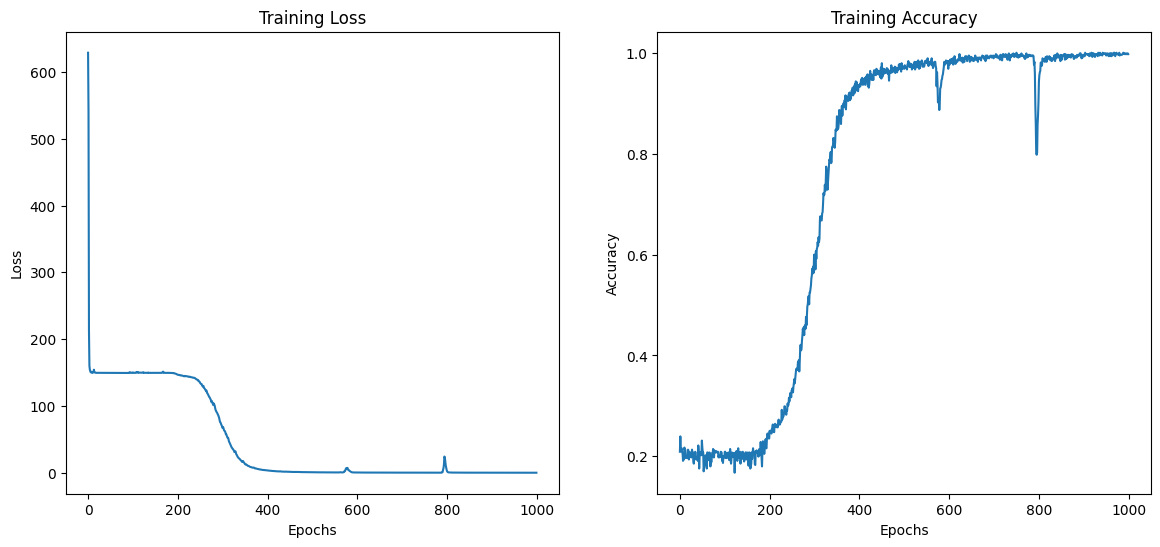

In [486]:
# Plotting the training and validation loss
# plt.figure(figsize=(10, 8))
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].plot(history.history['loss'], label='Loss')
# axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Training Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')

# plot 2
axs[1].plot(history.history['accuracy'], label='accuracy')
axs[1].set_title('Training Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')

plt.show()

In [487]:
predictions = model.predict(X_test)

2/2 [==============================] - 2s 9ms/step


In [488]:
# for idx in range(0, y_test.shape[0]):
#   predicted = np.round(predictions[idx]).astype(int)
#   print(f'row {idx}:----------------------------------------------------------','\ny_pred', predicted, '\ny_test', y_test[idx], '\nvalid ',np.isin(np.round(predictions[idx,:5]).astype(int), y_test[idx,:5]), np.isin(np.round(predictions[idx,-2:]).astype(int), y_test[idx,-2:]))

In [489]:
def post_traitement(predic):
    predicted = []
    for idx in range(y_test.shape[0]):
        array = np.clip(np.round(predic[idx]).astype(int), 1, 50)

        # unique_values, counts = np.unique(array[:5], return_counts=True)
        # duplicates_exist = any(counts > 1)
        unique_star, counts_s = np.unique(array[-2:], return_counts=True)
        duplicates_star = any(counts_s > 1)

        # if duplicates_exist:
        #     duplicate_indices = np.where(np.isin(array[:5], unique_values[counts > 1]))[0]
        #     val0 = (predic[idx][duplicate_indices[0]] - array[duplicate_indices[0]])**2
        #     val1 = (predic[idx][duplicate_indices[1]] - array[duplicate_indices[1]])**2

        #     # Update array based on minimizing squared differences
        #     if val0 < val1:
        #         array[duplicate_indices[1]] += 1 if (predic[idx][1] > array[duplicate_indices[1]] and ((array[duplicate_indices[1]] + 1) not in array[:5])) else -1
        #     else:
        #         array[duplicate_indices[0]] += 1 if (predic[idx][0] > array[duplicate_indices[0]] and ((array[duplicate_indices[0]] + 1) not in array[:5])) else -1

        if duplicates_star:
            star_indices = np.where(np.isin(array[-2:], unique_star[counts_s > 1]))[0]
            star0 = (predic[idx][star_indices[0]] - array[star_indices[0]])**2
            star1 = (predic[idx][star_indices[1]] - array[star_indices[1]])**2

            # Update array based on minimizing squared differences
            if star0 < star1:
                array[star_indices[1]+5] += 1 if predic[idx][1] > array[star_indices[1]+5] else -1
            else:
                array[star_indices[0]+5] += 1 if predic[idx][0] > array[star_indices[0]+5] else -1

        #Printing results for test
        print(f'row {idx}:----------------------------------------------------------','\ny_pred', array, '\ny_test', y_test[idx], '\nvalid ',np.isin(array[:5], y_test[idx,:5]), np.isin(array[-2:], y_test[idx,-2:]))
        # Append the processed array to the predicted list
        predicted.append(array)

    return predicted

In [490]:
predictions[7]

array([21.476273 , 44.16775  ,  9.301424 , 27.955645 , 48.59021  ,
        3.6369817,  6.323467 ], dtype=float32)

In [491]:
prediction_test = post_traitement(predictions)

row 0:---------------------------------------------------------- 
y_pred [43 26  8 36 20  9  2] 
y_test [44 38  4 31 10 10  8] 
valid  [False False False False False] [False False]
row 1:---------------------------------------------------------- 
y_pred [20 32 25 26  4 12  7] 
y_test [ 3  4 50 46 15  9  5] 
valid  [False False False False  True] [False False]
row 2:---------------------------------------------------------- 
y_pred [27 28 12 26 30 13  7] 
y_test [ 4 17 44 23  3  6  9] 
valid  [False False False False False] [False False]
row 3:---------------------------------------------------------- 
y_pred [ 5 21 23 33  8  7  8] 
y_test [28 45 20 17 48  9  5] 
valid  [False False False False False] [False False]
row 4:---------------------------------------------------------- 
y_pred [ 5 31 14 24 28  6  8] 
y_test [ 5  1 23 17  7  3  8] 
valid  [ True False False False False] [False  True]
row 5:---------------------------------------------------------- 
y_pred [16 41 14 25 45  6  7]